# Laptop Prices

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from patsy import dmatrices
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load csv file 
df = pd.read_csv('../datasets/laptop_price.csv',encoding="ISO-8859-1")

In [4]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


df.describe()

In [13]:
df = df.drop('laptop_ID',axis=1)

## Price

In [1]:
sns.distplot(df['Price'])

NameError: name 'sns' is not defined

### Company

In [15]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

<AxesSubplot:xlabel='Count', ylabel='Company'>

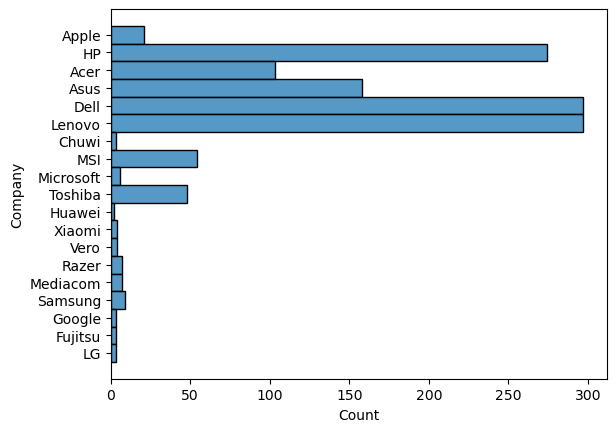

In [22]:
sns.histplot(data=df, y='Company')

In [33]:
df.groupby('Company')['Price_euros'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Acer,103.0,626.775825,375.671363,174.00,385.5000,559.00,774.5000,2599.00
Apple,21.0,1564.198571,561.623595,898.94,1163.0000,1339.69,1958.9000,2858.00
Asus,158.0,1104.169367,702.490232,191.90,537.2500,1012.50,1488.2500,3975.00
Chuwi,3.0,314.296667,116.672889,244.99,246.9450,248.90,348.9500,449.00
Dell,297.0,1186.068990,672.941227,274.90,735.0700,985.00,1472.2000,3659.40
Fujitsu,3.0,729.000000,75.498344,649.00,694.0000,739.00,769.0000,799.00
Google,3.0,1677.666667,473.292017,1275.00,1417.0000,1559.00,1879.0000,2199.00
HP,274.0,1067.774854,617.508031,209.00,615.9975,966.50,1389.0000,4389.00
Huawei,2.0,1424.000000,106.066017,1349.00,1386.5000,1424.00,1461.5000,1499.00


<AxesSubplot:xlabel='Price_euros', ylabel='Company'>

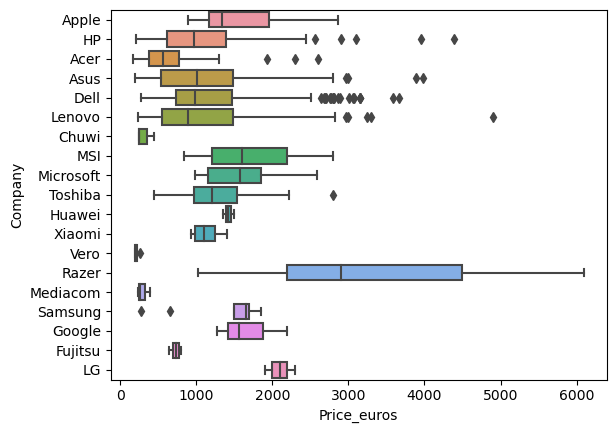

In [27]:
sns.boxplot(data=df, y='Company', x='Price_euros')

In [ ]:

X['Sex']= le.fit_transform(X['Sex'])
X['Embarked']= le.fit_transform(X['Embarked'])

X.head()

### Inches

In [38]:
df['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

Text(0.5, 1.0, 'Distribution of Inches')

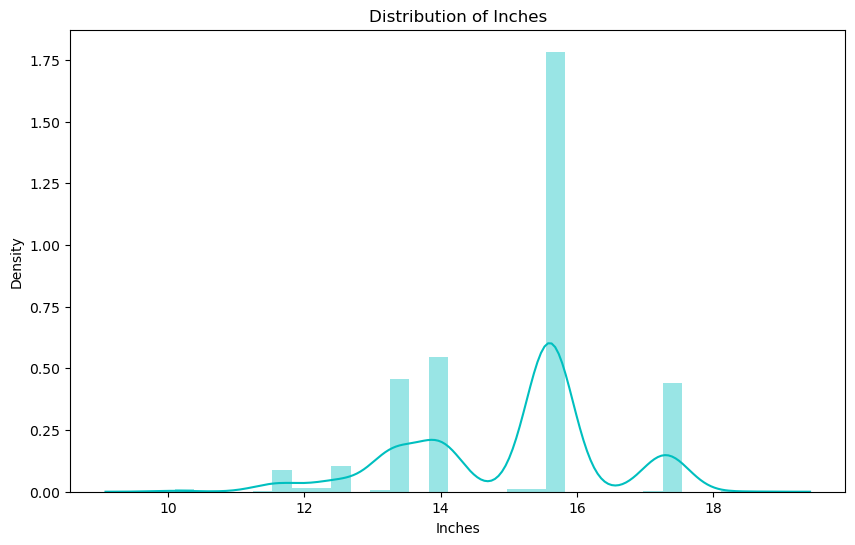

In [46]:
f, ax = plt.subplots(1,1, figsize=(10, 6))
ax = sns.distplot(df['Inches'], kde = True, color = 'c')
plt.title('Distribution of Inches')

In [47]:
df.groupby('Inches')['Price_euros'].describe()

,count,mean,std,min,25%,50%,75%,max
Inches,,,,,,,,
10.1,4.0,498.317500,137.824272,319.00,439.00,514.000,573.3175,646.27
11.3,1.0,1299.000000,NaN,1299.00,1299.00,1299.000,1299.0000,1299.00
11.6,33.0,393.613636,182.814019,174.00,269.00,349.000,479.0000,959.00
12.0,6.0,1279.900000,126.905240,1163.00,1189.35,1270.700,1294.7500,1510.00
12.3,5.0,1228.200000,704.487899,449.00,659.00,1275.000,1559.0000,2199.00
12.5,39.0,1583.493077,400.816316,669.00,1369.00,1584.000,1775.0000,3100.00
13.0,2.0,1424.000000,106.066017,1349.00,1386.50,1424.000,1461.5000,1499.00
13.3,164.0,1332.318354,501.426041,196.00,949.00,1319.000,1654.7500,2799.00
13.5,6.0,1612.308333,598.431057,989.00,1151.75,1569.500,1850.6375,2589.00


In [50]:
df.groupby(['Inches','ScreenResolution'])['Price_euros'].describe()

count         mean  \
Inches ScreenResolution                                                
10.1   IPS Panel Touchscreen 1920x1200              4.0   498.317500   
11.3   IPS Panel Full HD / Touchscreen 1920x1080    1.0  1299.000000   
11.6   1366x768                                    18.0   348.680556   
       IPS Panel 1366x768                           3.0   401.666667   
       IPS Panel Full HD / Touchscreen 1920x1080    2.0   324.000000   
...                                                 ...          ...   
17.3   IPS Panel 2560x1440                          1.0  2799.000000   
       IPS Panel 4K Ultra HD 3840x2160              4.0  2979.592500   
       IPS Panel Full HD / Touchscreen 1920x1080    1.0  1269.000000   
       IPS Panel Full HD 1920x1080                 51.0  1977.996863   
18.4   Full HD 1920x1080                            1.0  2799.000000   

                                                         std     min      25%  \
Inches ScreenResolution                                                         
10.1   IPS Panel Touchscreen 1920x1200            137.824272   319.0   439.00   
11.3   IPS Panel Full HD / Touchscreen 1920x1080         NaN  1299.0  1299.00   
11.6   1366x768                                   204.191877   174.0   218.00   
       IPS Panel 1366x768                         134.228661   297.0   326.00   
       IPS Panel Full HD / Touchscreen 1920x1080   35.355339   299.0   311.50   
...                                                      ...     ...      ...   
17.3   IPS Panel 2560x1440                               NaN  2799.0  2799.00   
       IPS Panel 4K Ultra HD 3840x2160            236.638298  2649.0  2888.25   
       IPS Panel Full HD / Touchscreen 1920x1080         NaN  1269.0  1269.00   
       IPS Panel Full HD 1920x1080                984.829097   569.0  1094.00   
18.4   Full HD 1920x1080                                 NaN  2799.0  2799.00   

                                                       50%        75%      max  
Inches ScreenResolution                                                         
10.1   IPS Panel Touchscreen 1920x1200             514.000   573.3175   646.27  
11.3   IPS Panel Full HD / Touchscreen 1920x1080  1299.000  1299.0000  1299.00  
11.6   1366x768                                    278.450   373.7500   959.00  
       IPS Panel 1366x768                          355.000   454.0000   553.00  
       IPS Panel Full HD / Touchscreen 1920x1080   324.000   336.5000   349.00  
...                                                    ...        ...      ...  
17.3   IPS Panel 2560x1440                        2799.000  2799.0000  2799.00  
       IPS Panel 4K Ultra HD 3840x2160            3057.685  3149.0275  3154.00  
       IPS Panel Full HD / Touchscreen 1920x1080  1269.000  1269.0000  1269.00  
       IPS Panel Full HD 1920x1080                1935.000  2681.0000  4389.00  
18.4   Full HD 1920x1080                          2799.000  2799.0000  2799.00  

[87 rows x 8 columns]